# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observation
* It has been proven that the temperature is higher as you are closer to equator. 
* Based on the analysis temperature is being observed as correlated to latitude. However, between the southern and northern hemisphere, it is shown that northern part is more senstive to latitude where furhter you are north from the equator, temperature tends to drop more significantly.
* Wind speed, humidity, and cloudiness doesn't seem to be correlated to latitude

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
# print(cities)


609


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up multiple lists to hold response data
city_number = []
city_name = []
cloudiness = []
country =[]
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_num = 1

for city in cities:
    try:
#         print(query_url + city)
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(city)
        time.sleep(0.1)
        print(f"Adding city # {city_num} {city} to dataframe")
        city_number.append(city_num)
        city_num = city_num +1
    except:
        print(f"City {city} not found. Skipping...")

City jinchengjiang not found. Skipping...
Adding city # 1 dikson to dataframe
City taolanaro not found. Skipping...
Adding city # 2 albany to dataframe
Adding city # 3 ucluelet to dataframe
Adding city # 4 rabo de peixe to dataframe
Adding city # 5 baghdad to dataframe
Adding city # 6 mataura to dataframe
Adding city # 7 lerwick to dataframe
City vaitupu not found. Skipping...
Adding city # 8 santa ines to dataframe
Adding city # 9 puerto princesa to dataframe
Adding city # 10 vila to dataframe
Adding city # 11 bundaberg to dataframe
Adding city # 12 catamarca to dataframe
Adding city # 13 rio grande to dataframe
Adding city # 14 atuona to dataframe
Adding city # 15 inuvik to dataframe
Adding city # 16 busselton to dataframe
Adding city # 17 broken hill to dataframe
Adding city # 18 chokurdakh to dataframe
Adding city # 19 souillac to dataframe
Adding city # 20 ushuaia to dataframe
Adding city # 21 murgab to dataframe
Adding city # 22 ribeira grande to dataframe
Adding city # 23 inhamb

Adding city # 185 sinnamary to dataframe
Adding city # 186 yelizovo to dataframe
Adding city # 187 hargeysa to dataframe
Adding city # 188 whitehorse to dataframe
Adding city # 189 parrita to dataframe
Adding city # 190 east london to dataframe
Adding city # 191 igboho to dataframe
Adding city # 192 kerema to dataframe
Adding city # 193 naze to dataframe
Adding city # 194 atar to dataframe
Adding city # 195 nabire to dataframe
Adding city # 196 taltal to dataframe
Adding city # 197 kalakamati to dataframe
Adding city # 198 san felipe to dataframe
Adding city # 199 buala to dataframe
Adding city # 200 fort nelson to dataframe
Adding city # 201 ahvaz to dataframe
Adding city # 202 comodoro rivadavia to dataframe
Adding city # 203 narsaq to dataframe
Adding city # 204 mulanje to dataframe
Adding city # 205 touros to dataframe
Adding city # 206 kropotkin to dataframe
Adding city # 207 ponta delgada to dataframe
Adding city # 208 old shinyanga to dataframe
Adding city # 209 werneck to dataf

Adding city # 374 chuy to dataframe
Adding city # 375 misawa to dataframe
Adding city # 376 along to dataframe
Adding city # 377 sitka to dataframe
Adding city # 378 khrebtovaya to dataframe
Adding city # 379 ilulissat to dataframe
Adding city # 380 morgan city to dataframe
Adding city # 381 abu dhabi to dataframe
Adding city # 382 sucre to dataframe
Adding city # 383 kaniama to dataframe
Adding city # 384 flinders to dataframe
Adding city # 385 porbandar to dataframe
Adding city # 386 iralaya to dataframe
Adding city # 387 caravelas to dataframe
Adding city # 388 tautira to dataframe
Adding city # 389 mayumba to dataframe
Adding city # 390 prescott to dataframe
Adding city # 391 nizwa to dataframe
Adding city # 392 champerico to dataframe
Adding city # 393 jabinyanah to dataframe
City umzimvubu not found. Skipping...
Adding city # 394 hovd to dataframe
Adding city # 395 ler to dataframe
Adding city # 396 mogok to dataframe
Adding city # 397 vao to dataframe
Adding city # 398 amor to d

In [31]:
print(len(city_number))

558


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Creating a DataFrame
weather_dict = {
    "City_ID": city_number,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lat,
    "Longitude" : lng,
    "Max Temperature" : max_temp,
    "Wind Speed" : wind_speed
}

weather_df = pd.DataFrame(weather_dict)

# Removing duplicates and creating dataframe with unique cities.
weather_data = weather_df.drop_duplicates(subset=["City"])
# len(weather_df["City"].unique())

# Display the DataFrame
weather_data


,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,1,dikson,94,RU,1635650805,90,73.5069,80.5464,6.19,15.08
1,2,albany,100,US,1635650767,97,42.6001,-73.9662,55.35,3.20
2,3,ucluelet,2,CA,1635650806,60,48.9329,-125.5528,39.96,6.78
3,4,rabo de peixe,100,PT,1635650806,94,37.8000,-25.5833,69.60,15.50
4,5,baghdad,20,IQ,1635650654,68,33.3406,44.4009,73.31,6.91
...,...,...,...,...,...,...,...,...,...,...
553,554,apud,52,PH,1635651004,56,13.1393,123.2916,86.77,4.21
554,555,carrollton,1,US,1635650983,43,32.9537,-96.8903,64.11,4.61
555,556,chakwal,0,PK,1635651005,28,32.9334,72.8585,70.56,3.60
556,557,pinhao,100,BR,1635651006,97,-25.6956,-51.6597,59.29,6.51


In [61]:
# Exporting the data into a .csv file
weather_data.to_csv("../output_data/cities_data.csv", index=False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
weather_data.describe()

,City_ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,558.000000,558.000000,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000
mean,279.500000,60.553763,1.635651e+09,72.761649,19.756149,16.619444,60.010323,7.562688
std,161.224998,40.256892,2.032316e+02,20.838151,32.509562,89.732936,20.612441,5.694056
min,1.000000,0.000000,1.635650e+09,1.000000,-54.800000,-175.200000,-8.210000,0.000000
25%,140.250000,16.250000,1.635651e+09,62.000000,-7.200250,-64.843075,47.575000,3.530000
50%,279.500000,75.000000,1.635651e+09,77.000000,24.577200,20.840450,65.230000,6.210000
75%,418.750000,100.000000,1.635651e+09,89.000000,45.259450,95.182725,75.692500,10.232500
max,558.000000,100.000000,1.635651e+09,100.000000,78.218600,179.316700,98.940000,33.380000


In [63]:

#  Get the indices of cities that have humidity over 100%.
weather_high_humidity = weather_data.loc[weather_data["Humidity"]>100]
weather_high_humidity

,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed


In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

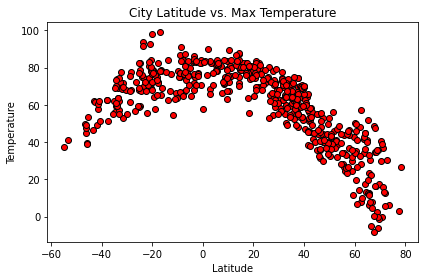

In [65]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.tight_layout()
plt.savefig("../output_data/Lat_Temp.png")
plt.show()

Comments
* Temperatures are high as it is closest to equator where Latitude = 0 and as it gets further away from the equator temperature is dropping.
* Northern hemisphere show more drop in temperature as it gets further away from the equator than southern hemishpere.

## Latitude vs. Humidity Plot

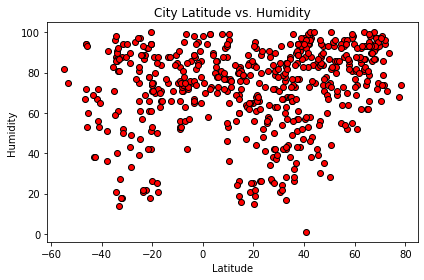

In [66]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.tight_layout()
plt.savefig("../output_data/Lat_Humidity.png")
plt.show()

Comments
* No significant relationship between humidity and latitude has been observed.
* Average humidity is 72

## Latitude vs. Cloudiness Plot

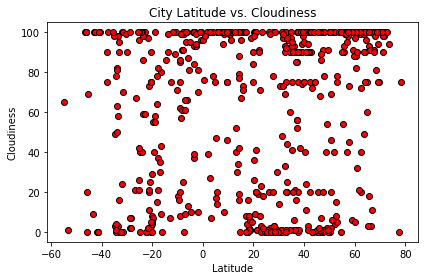

In [67]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.tight_layout()
plt.savefig("../output_data/Lat_Cloud.png")
plt.show()

Comments
* No significant relationship between cloudiness and latitude has been observed.

## Latitude vs. Wind Speed Plot

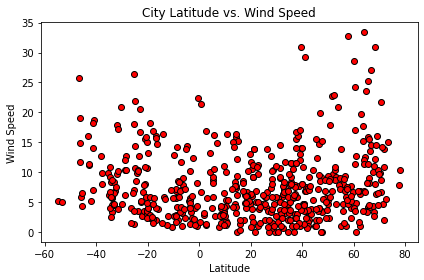

In [68]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


plt.tight_layout()
plt.savefig("../output_data/Lat_Wind.png")
plt.show()

Comments
* No significant relationship between wind speed and latitude has been observed.

## Linear Regression

In [69]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude)
# Southern Hemisphere (less than 0 degrees latitude)

North_hem_df = weather_data.loc[weather_data["Latitude"]>=0]
# print(North_hem_df)
South_hem_df = weather_data.loc[weather_data["Latitude"]<0]
# print(South_hem_df)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.771380483036329


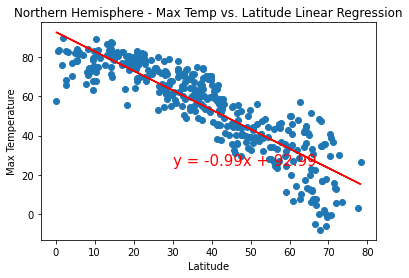

In [70]:
x_values = North_hem_df["Latitude"]
y_values = North_hem_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is a considerable correlation between temperature and latitude in northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44928722218925327


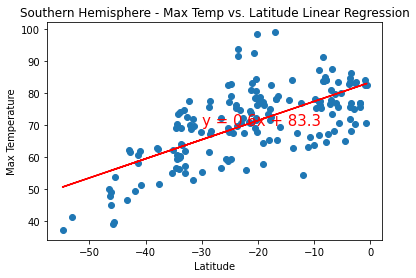

In [81]:
x_values = South_hem_df["Latitude"]
y_values = South_hem_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is a correlation between temperature and latitude in southern hemisphere but less than it is with northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06867560072208306


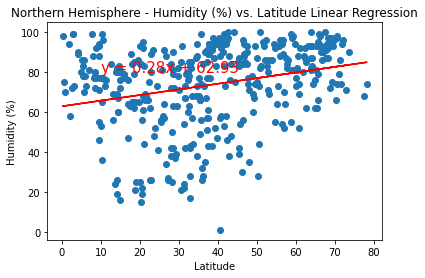

In [82]:
x_values = North_hem_df["Latitude"]
y_values = North_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is little or no correlation between humidity and latitude for both northern and southern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020869122384399585


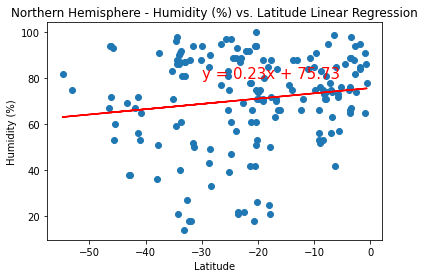

In [83]:
x_values = South_hem_df["Latitude"]
y_values = South_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,80),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is less or no correlation between humidity and latitude for both northern and southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028597413651458962


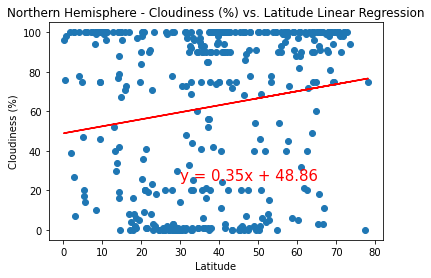

In [84]:
x_values = North_hem_df["Latitude"]
y_values = North_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is less or no correlation between cloudiness and latitude for both northern and southern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.027445829226732315


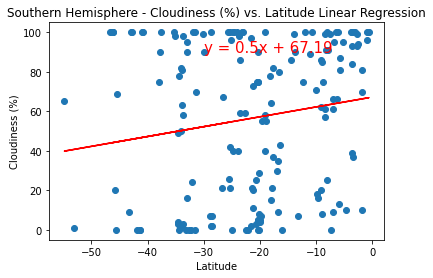

In [85]:
x_values = South_hem_df["Latitude"]
y_values = South_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,90),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is less or no correlation between cloudiness and latitude for both northern and southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05363923897071092


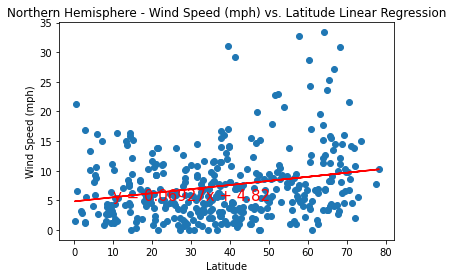

In [86]:
x_values = North_hem_df["Latitude"]
y_values = North_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is less or no correlation between wind speed and latitude for both northern and southern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07060471901247835


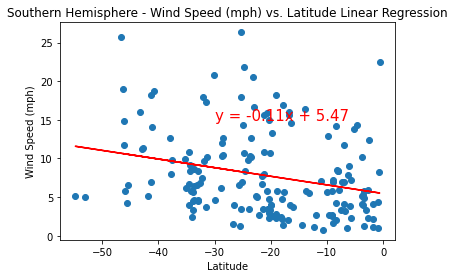

In [77]:
x_values = South_hem_df["Latitude"]
y_values = South_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

* There is less or no correlation between wind speed and latitude for both northern and southern hemisphere.